Moudule:CASA0013 Introduction to Programming for Spatial Analysts (20/21)<P>
    Student ID:20063730 Candidate Number: WDHZ2 <P>
    Title:**Changes to Airbnb rentals in the face of the Covid-19 outbreak**<P>
    Word count:1624<P>
    ps:I am using Anaconda and have the sds2020 environment installed, just in case I also export this environment variable<p>
     Due to the use of two years of dataset, the amount of data compressed still does not meet the requirements.Therefore, there is no dataset in the zip package, but it has been uploaded to github.<p>

## Catalogue

**Executive Summary**<p>
    
**Reproducible Analysis**<p>
    
 2.1 Data understanding<p>
2.2 saving raw data<p>
2.3 Extracting the Dataframe<p>
2.4 Clean the data<p>
2.4.1 Converting<p>
2.4.1.1 Bools<p>
2.4.1.2 Category<p>
2.4.1.3 Price <p>
2.4.1.4 Integers <p>
2.5 Verification <p>
2.6 Saving <p>
2.7 Plot<p>
2.7.1 Room Type<p>
2.7.2 List of the Most common type of room in every price<p>
2.7.3 Price per Room Type<p>
2.7.4  Possible Correlation Analysis.<p>
    
**Executive Briefing**<p>

3.1 Introduction<p>
3.2 Key Findings<p>
3.2.1 Overall Price Increase<p>
3.2.2 Hotel Rooms Have Risen the Most <p>
3.3 Recommendations<p>
    
**References**<p>



## Executive Summary 

As the COVID-19 epidemic has spread around the world, it has forced the world economy into recession, limiting the structure of the real estate market in the global industry (Monitor, 2020), and even more governments are facing high unemployment rates. As a result the people of the UK have also suffered from unemployment, low wages, increased business failures, inflation and the structure of an unresponsive market. This had an equal impact on the property market as people were forced to leave businesses (Arcaya, Nidam & Binet, 2020). With this shift in supply and demand, it is worth exploring whether the prices of Airbnb's listings, the world's largest short-term rental platform, will be subject to fluctuations. This brief therefore explores the impact of the Covid-19 epidemic on Airbnb's daily price and what changes Airbnb can make to meet the challenges posed by the COVID-19 epidemic, based on Airbnb listing data for both the 2020 and 2021 time periods.<p>
There are three main key findings： Firstly, the average price of an Airbnb listing (in $) was 118 as of September 2020 and rose to 140 as of September 2021, an increase of 18.6%. 2021 average home prices are growing at twice the rate of 2020, and the average price of an Airbnb listing is rising faster rather than falling. Secondly, the price of every room type has increased, with hotel rooms increasing the most, followed by private rooms, shared rooms, and entire home/apt being the smallest increases. However, the proportion of each type of room remained largely unchanged. Finally, we can also see that prices are related to the number of properties owned by the owner, and whether or not to book more time slots within a year is related to the owner themselves and their rating. It can be seen that the landlord plays a large part in this factor.


# Reproducible Analysis

In [1]:
# Library Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-deep")
import os
import random
import re

import geopandas as gpd
import matplotlib as mpl
import matplotlib.cm as cm
import sklearn
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import (
    MinMaxScaler,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

random.seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility

# Make numeric display a bit neater
pd.set_option("display.float_format", lambda x: "{:,.2f}".format(x))

In [2]:
rbs = RobustScaler(quantile_range=[0.025, 0.975])
mms = MinMaxScaler(feature_range=(-1, 1))
pts = PowerTransformer()

In [3]:
def plt_ldn(w, b):
    fig, ax = plt.subplots(1, figsize=(14, 12))
    w.plot(ax=ax, color="#79aef5", zorder=2)
    b.plot(ax=ax, edgecolor="#cc2d2d", facecolor="None", zorder=3)
    ax.set_xlim([502000, 563000])
    ax.set_ylim([155000, 201500])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    return fig, ax


########################
# These may no longer be relevant because of changes to geopandas API


def default_cmap(n, outliers=False):
    cmap = mpl.cm.get_cmap("viridis_r", n)
    colors = cmap(np.linspace(0, 1, n))
    if outliers:
        gray = np.array([225 / 256, 225 / 256, 225 / 256, 1])
        colors = np.insert(colors, 0, gray, axis=0)
    return ListedColormap(colors)


# mappable = ax.collections[-1] if you add the geopandas
# plot last.
def add_colorbar(mappable, ax, cmap, norm, breaks, outliers=False):
    cb = fig.colorbar(
        mappable,
        ax=ax,
        cmap=cmap,
        norm=norm,
        boundaries=breaks,
        extend=("min" if outliers else "neither"),
        spacing="uniform",
        orientation="horizontal",
        fraction=0.05,
        shrink=0.5,
        pad=0.05,
    )
    cb.set_label("Cluster Number")

## 2.1 Data understanding

In [5]:
# Set download URL
url = 'https://github.com/ucfnjz0/Assignment3/raw/main/listings.csv.gz'

listings = pd.read_csv(url, compression='gzip', low_memory=False)

print(f"Data frame is {listings.shape[0]:,} x {listings.shape[1]}")

Data frame is 67,903 x 74


In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211010233627,2021-10-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
1,15400,https://www.airbnb.com/rooms/15400,20211010233627,2021-10-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.79
2,17402,https://www.airbnb.com/rooms/17402,20211010233627,2021-10-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,2,2,0,0,0.35
3,17506,https://www.airbnb.com/rooms/17506,20211010233627,2021-10-12,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,24328,https://www.airbnb.com/rooms/24328,20211010233627,2021-10-12,"Battersea bedroom & studio, parking, shared ga...","Artist house, bright high ceiling rooms, priva...","- Battersea is a quiet family area, easy acces...",https://a0.muscache.com/pictures/c4ffa398-ebfd...,41759,https://www.airbnb.com/users/show/41759,...,4.93,4.58,4.64,NaN,f,1,1,0,0,0.77


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67903 entries, 0 to 67902
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67903 non-null  int64  
 1   listing_url                                   67903 non-null  object 
 2   scrape_id                                     67903 non-null  int64  
 3   last_scraped                                  67903 non-null  object 
 4   name                                          67879 non-null  object 
 5   description                                   65388 non-null  object 
 6   neighborhood_overview                         40964 non-null  object 
 7   picture_url                                   67903 non-null  object 
 8   host_id                                       67903 non-null  int64  
 9   host_url                                      67903 non-null 

In [8]:
print(list(listings.columns.values))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

In [9]:
# Set download URL
url2020 = 'https://github.com/ucfnjz0/Assignment3/raw/main/2020listings.csv.gz'

listings2020 = pd.read_csv(url2020, compression='gzip', low_memory=False)

print(f"Data frame is {listings2020.shape[0]:,} x {listings2020.shape[1]}")

Data frame is 74,188 x 74


In [10]:
listings2020.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,"11,551.00",https://www.airbnb.com/rooms/11551,20200824024753,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,"43,039.00",https://www.airbnb.com/users/show/43039,...,10.00,9.00,9.00,NaN,t,2.00,2.00,0.00,0.00,1.51
1,"13,913.00",https://www.airbnb.com/rooms/13913,20200824024753,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/ffb507b7-983c...,"54,730.00",https://www.airbnb.com/users/show/54730,...,10.00,9.00,9.00,NaN,f,3.00,1.00,2.00,0.00,0.17
2,"15,400.00",https://www.airbnb.com/rooms/15400,20200824024753,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,"60,302.00",https://www.airbnb.com/users/show/60302,...,10.00,10.00,9.00,NaN,t,1.00,1.00,0.00,0.00,0.68
3,"17,402.00",https://www.airbnb.com/rooms/17402,20200824024753,2020-08-27,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,"67,564.00",https://www.airbnb.com/users/show/67564,...,9.00,10.00,9.00,NaN,t,14.00,14.00,0.00,0.00,0.37
4,"17,506.00",https://www.airbnb.com/rooms/17506,20200824024753,2020-08-26,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,"67,915.00",https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2.00,0.00,2.00,0.00,NaN


In [11]:
listings2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74188 entries, 0 to 74187
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            74186 non-null  float64
 1   listing_url                                   74187 non-null  object 
 2   scrape_id                                     74187 non-null  object 
 3   last_scraped                                  74187 non-null  object 
 4   name                                          74167 non-null  object 
 5   description                                   71329 non-null  object 
 6   neighborhood_overview                         47208 non-null  object 
 7   picture_url                                   74188 non-null  object 
 8   host_id                                       74188 non-null  float64
 9   host_url                                      74188 non-null 

In [12]:
print(list(listings2020.columns.values))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

## 2.2 saving raw data 

In [13]:
import os
path = os.path.join('data','raw') # A default location to save raw data
fn   = url.split('/')[-1]         # What does this do?
print(f"Writing to: {fn}")

Writing to: listings.csv.gz


In [14]:
if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
listings.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Done.


In [15]:
import os
path2020 = os.path.join('data','raw2020') # A default location to save raw data
fn2020   = url2020.split('/')[-1]         # What does this do?
print(f"Writing to: {fn2020}")

Writing to: 2020listings.csv.gz


In [16]:
if not os.path.exists(path2020):
    print(f"Creating {path2020} under {os.getcwd()}")
    os.makedirs(path2020)
    
listings2020.to_csv(os.path.join(path2020,fn2020), index=False)
print("Done.")

Done.


## 2.3 Extracting the Dataframe

In [17]:
cols = [
    "neighbourhood_cleansed",
    "id",
    "listing_url",
    "last_scraped",
    "name",
    "description",
    "host_id",
    "host_name",
    "host_since",
    "host_location",
    "host_is_superhost",
    "host_listings_count",
    "host_total_listings_count",
    "host_verifications",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms_text",
    "bedrooms",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "number_of_reviews",
    "first_review",
    "last_review",
    "review_scores_rating",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "instant_bookable",
    "calculated_host_listings_count",
    "reviews_per_month",
    'host_about',
    'host_response_rate', 
    'bathrooms', 
    'license',
    'host_acceptance_rate'
]
#['host_about', 'host_response_rate', 'bathrooms', 'license', 'host_acceptance_rate'] not in index"

In [18]:
cols2020 = [
    "neighbourhood_cleansed",
    "id",
    "listing_url",
    "last_scraped",
    "name",
    "description",
    "host_id",
    "host_name",
    "host_since",
    "host_location",
    "host_is_superhost",
    "host_listings_count",
    "host_total_listings_count",
    "host_verifications",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms_text",
    "bedrooms",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "number_of_reviews",
    "first_review",
    "last_review",
    "review_scores_rating",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "instant_bookable",
    "calculated_host_listings_count",
    "reviews_per_month",
    'host_about',
    'host_response_rate', 
    'bathrooms', 
    'license',
    'host_acceptance_rate'
]
#['host_about', 'host_response_rate', 'bathrooms', 'license', 'host_acceptance_rate'] not in index"

In [19]:
del(listings2020)
listings2020 = pd.read_csv(os.path.join(path2020,fn2020), low_memory=False, usecols=cols,nrows=67903)#
print(f"Data frame is {listings2020.shape[0]:,} x {listings2020.shape[1]}")

Data frame is 67,903 x 43


In [20]:
del(listings)
listings = pd.read_csv(os.path.join(path,fn), low_memory=False, usecols=cols)
print(f"Data frame is {listings.shape[0]:,} x {listings.shape[1]}")

Data frame is 67,903 x 43


In [21]:
listings2020.head()

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month
0,"11,551.00",https://www.airbnb.com/rooms/11551,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"43,039.00",Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",...,2020-03-26,91.00,9.00,10.00,10.00,9.00,NaN,t,2.00,1.51
1,"13,913.00",https://www.airbnb.com/rooms/13913,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"54,730.00",Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,...,2020-02-22,97.00,10.00,10.00,10.00,9.00,NaN,f,3.00,0.17
2,"15,400.00",https://www.airbnb.com/rooms/15400,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,"60,302.00",Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",...,2020-03-16,96.00,10.00,10.00,10.00,10.00,NaN,t,1.00,0.68
3,"17,402.00",https://www.airbnb.com/rooms/17402,2020-08-27,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"67,564.00",Liz,2010-01-04,"London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,...,2019-11-02,94.00,9.00,9.00,9.00,10.00,NaN,t,14.00,0.37
4,"17,506.00",https://www.airbnb.com/rooms/17506,2020-08-26,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,"67,915.00",Charlotte,2010-01-05,"London, England, United Kingdom","Named best B&B by The Times. Easy going hosts,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2.00,NaN


In [22]:
listings.head()

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,2021-10-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,...,2011-09-13,4.85,4.84,4.79,4.89,4.63,NaN,f,2,0.17
1,15400,https://www.airbnb.com/rooms/15400,2021-10-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",...,2019-08-10,4.79,4.88,4.87,4.82,4.93,NaN,f,1,0.79
2,17402,https://www.airbnb.com/rooms/17402,2021-10-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,67564,Liz,2010-01-04,"Brighton and Hove, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,...,2019-11-02,4.69,4.68,4.66,4.66,4.85,NaN,f,2,0.35
3,17506,https://www.airbnb.com/rooms/17506,2021-10-12,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,67915,Charlotte,2010-01-05,"London, England, United Kingdom","Named best B&B by The Times. Easy going hosts,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,NaN
4,24328,https://www.airbnb.com/rooms/24328,2021-10-12,"Battersea bedroom & studio, parking, shared ga...","Artist house, bright high ceiling rooms, priva...",41759,Joe,2009-09-28,"Greater London, England, United Kingdom","I've been using Airbnb for a while now, both a...",...,2015-10-24,4.89,4.92,4.89,4.93,4.58,NaN,f,1,0.77


## 2.4 Clean the data

In [23]:
#Columns
listings.isnull().sum(axis=0).sort_values(ascending=False)[:20]

bathrooms                      67903
license                        67903
host_response_rate             34288
host_acceptance_rate           33907
host_about                     30360
review_scores_location         20468
review_scores_checkin          20467
review_scores_communication    20430
review_scores_cleanliness      20415
last_review                    19028
review_scores_rating           19028
first_review                   19028
reviews_per_month              19028
bedrooms                        4258
description                     2515
beds                             847
bathrooms_text                   188
host_location                    181
host_total_listings_count         32
host_listings_count               32
dtype: int64

In [24]:

listings.drop(columns=['bathrooms','license','host_response_rate','host_acceptance_rate','host_about'], inplace=True)

In [25]:
#Rows
listings.isnull().sum(axis=1).sort_values(ascending=False)

53370    18
53369    18
4203     14
3734     14
8147     14
         ..
26255     0
26256     0
26259     0
26260     0
33951     0
Length: 67903, dtype: int64

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

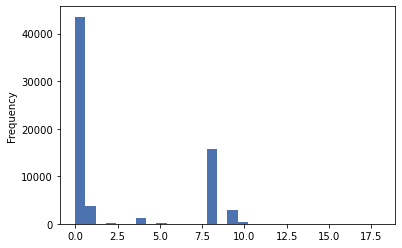

In [26]:
probs = listings.isnull().sum(axis=1)
print(type(probs))
probs.plot.hist(bins=30)

In [27]:
# I would take values greater than about 9
listings.drop(probs[probs > 9].index, inplace=True)

In [28]:
print(
    f"Have reduced data frame to: {listings.shape[0]} rows and {listings.shape[1]} columns"
)

Have reduced data frame to: 67493 rows and 38 columns


In [29]:
#Columns of listings2020
listings2020.isnull().sum(axis=0).sort_values(ascending=False)[:20]

license                        67903
bathrooms                      67901
host_response_rate             35252
host_about                     28397
host_acceptance_rate           21354
review_scores_checkin          16957
review_scores_location         16954
review_scores_communication    16917
review_scores_cleanliness      16909
review_scores_rating           16866
reviews_per_month              15274
last_review                    15272
first_review                   15272
bedrooms                        4016
description                     2238
beds                             537
host_location                    164
bathrooms_text                   150
name                              21
host_listings_count               13
dtype: int64

In [30]:
listings2020.drop(columns=['bathrooms','license','host_response_rate','host_acceptance_rate','host_about'], inplace=True)

In [31]:
listings2020.isnull().sum(axis=1).sort_values(ascending=False)

29989    29
3558     29
10240    14
18095    14
9767     14
         ..
25630     0
25632     0
25634     0
25636     0
33951     0
Length: 67903, dtype: int64

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

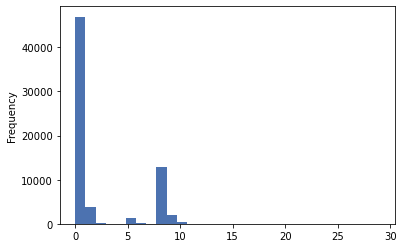

In [32]:
probs2020 = listings2020.isnull().sum(axis=1)
print(type(probs2020))       # Note that this has returned a series!
probs2020.plot.hist(bins=30)

In [33]:
listings2020.drop(probs2020[probs2020 > 9].index, inplace=True)
print(f"Have reduced data frame to: {listings2020.shape[0]} rows and {listings2020.shape[1]} columns")

Have reduced data frame to: 67556 rows and 38 columns


### 2.4.1 Converting

#### 2.4.1.1 Bools

In [34]:
# convert "t/f" to "True/False"
bools = ["instant_bookable", "host_is_superhost"]
listings.sample(20, random_state=43)[bools]

,instant_bookable,host_is_superhost
606,f,f
31241,f,t
13102,f,f
18573,t,f
4081,f,f
59247,t,f
107,f,t
58334,f,f
17796,f,f
40539,t,t


In [35]:
# convert "t/f" to "True/False"
bools2020 = ["instant_bookable", "host_is_superhost"]
listings2020.sample(20, random_state=43)[bools2020]

,instant_bookable,host_is_superhost
62434,f,f
25153,f,f
59259,f,f
66663,t,f
49975,f,f
29855,f,f
49320,t,t
36413,t,f
51778,t,f
44048,t,f


In [36]:
map = {"f": False, "t": True}
for b in bools:
    print(f"Converting {b}")
    listings[b] = listings[b].replace(map).astype("bool")

Converting instant_bookable
Converting host_is_superhost


In [37]:
map2020 = {"f": False, "t": True}
for b2020 in bools2020:
    print(f"Converting {b2020}")
    listings2020[b2020] = listings2020[b2020].replace(map2020).astype("bool")

Converting instant_bookable
Converting host_is_superhost


In [38]:
listings.sample(10, random_state=43)[bools]

,instant_bookable,host_is_superhost
606,False,False
31241,False,True
13102,False,False
18573,True,False
4081,False,False
59247,True,False
107,False,True
58334,False,False
17796,False,False
40539,True,True


#### 2.4.1.2 Category

In [39]:
listings2020.sample(10, random_state=43)[bools2020]

,instant_bookable,host_is_superhost
62434,False,False
25153,False,False
59259,False,False
66663,True,False
49975,False,False
29855,False,False
49320,True,True
36413,True,False
51778,True,False
44048,True,False


In [40]:
cats = ["property_type", "room_type"]
listings.sample(5, random_state=43)[cats]

,property_type,room_type
606,Entire rental unit,Entire home/apt
31241,Entire rental unit,Entire home/apt
13102,Private room in residential home,Private room
18573,Private room in residential home,Private room
4081,Entire residential home,Entire home/apt


In [41]:
listings[cats[0]].value_counts()

Entire rental unit                  26508
Private room in rental unit         14756
Private room in residential home     9276
Entire residential home              5106
Entire condominium (condo)           3066
                                    ...  
Castle                                  1
Private room in castle                  1
Private room in shepherd's hut          1
Lighthouse                              1
Shared room in tiny house               1
Name: property_type, Length: 92, dtype: int64

In [42]:
listings[cats[1]].value_counts()

Entire home/apt    37799
Private room       28878
Shared room          464
Hotel room           352
Name: room_type, dtype: int64

In [43]:
for c in cats:
    print(f"Converting {c}")
    listings[c] = listings[c].astype('category')

Converting property_type
Converting room_type


In [44]:
print(listings[cats[1]].cat.categories.values)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [45]:
listings.sample(5, random_state=43)[cats]

,property_type,room_type
606,Entire rental unit,Entire home/apt
31241,Entire rental unit,Entire home/apt
13102,Private room in residential home,Private room
18573,Private room in residential home,Private room
4081,Entire residential home,Entire home/apt


#### 2.4.1.3 Price

In [46]:
money = ["price"]
listings.sample(5, random_state=43)[money]

,price
606,$80.00
31241,$160.00
13102,$31.00
18573,$29.00
4081,$185.00


In [47]:
money2020 = ["price"]
listings2020.sample(5, random_state=43)[money2020]

,price
62434,$100.00
25153,$43.00
59259,$55.00
66663,$25.00
49975,$70.00


In [48]:
for m in money:
    print(f"Converting {m}")
    listings[m] = listings[m].str.replace("$", "").str.replace(",", "").astype("float")

Converting price


<ipython-input-48-3cc6dde7bb02>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listings[m] = listings[m].str.replace("$", "").str.replace(",", "").astype("float")


In [49]:
for m2020 in money2020:
    print(f"Converting {m2020}")
    listings2020[m2020] = listings2020[m2020].str.replace("$", "").str.replace(",", "").astype("float")

Converting price


<ipython-input-49-9aa51f46ac95>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listings2020[m2020] = listings2020[m2020].str.replace("$", "").str.replace(",", "").astype("float")


In [50]:
listings.sample(50, random_state=43)[money]

,price
606,80.00
31241,160.00
13102,31.00
18573,29.00
4081,185.00
59247,275.00
107,250.00
58334,232.00
17796,400.00
40539,299.00


In [51]:
listings2020.sample(50, random_state=43)[money2020]

,price
62434,100.00
25153,43.00
59259,55.00
66663,25.00
49975,70.00
29855,120.00
49320,64.00
36413,569.00
51778,182.00
44048,45.00


#### 2.4.1.4 Integers

In [52]:
ints = [
    "id",
    "host_id",
    "host_listings_count",
    "host_total_listings_count",
    "accommodates",
    "beds",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "calculated_host_listings_count",
]
for i in ints:
    print(f"Converting {i}")
    try:
        listings[i] = listings[i].astype("float").astype("int")
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        listings[i] = listings[i].astype("float").astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
	Converting to unsigned 16-bit integer.
Converting host_total_listings_count
	Converting to unsigned 16-bit integer.
Converting accommodates
Converting beds
	Converting to unsigned 16-bit integer.
Converting minimum_nights
Converting maximum_nights
Converting availability_365
Converting calculated_host_listings_count


In [53]:
ints2020 = [
    "id",
    "host_id",
    "host_listings_count",
    "host_total_listings_count",
    "accommodates",
    "beds",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "calculated_host_listings_count",
]
for i2020 in ints2020:
    print(f"Converting {i2020}")
    try:
        listings2020[i2020] = listings2020[i2020].astype("float").astype("int")
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        listings2020[i2020] = listings2020[i2020].astype("float").astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
	Converting to unsigned 16-bit integer.
Converting host_total_listings_count
	Converting to unsigned 16-bit integer.
Converting accommodates
Converting beds
	Converting to unsigned 16-bit integer.
Converting minimum_nights
Converting maximum_nights
Converting availability_365
Converting calculated_host_listings_count


In [54]:
listings.beds.isna().value_counts()

False    66824
True       669
Name: beds, dtype: int64

In [55]:
listings2020.beds.isna().value_counts()

False    67193
True       363
Name: beds, dtype: int64

### 2.5 Verification

In [56]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67493 entries, 0 to 67902
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              67493 non-null  int32   
 1   listing_url                     67493 non-null  object  
 2   last_scraped                    67493 non-null  object  
 3   name                            67469 non-null  object  
 4   description                     65281 non-null  object  
 5   host_id                         67493 non-null  int32   
 6   host_name                       67476 non-null  object  
 7   host_since                      67476 non-null  object  
 8   host_location                   67345 non-null  object  
 9   host_is_superhost               67493 non-null  bool    
 10  host_listings_count             67476 non-null  UInt16  
 11  host_total_listings_count       67476 non-null  UInt16  
 12  host_verifications

In [57]:
listings2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67556 entries, 0 to 67902
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              67556 non-null  int32  
 1   listing_url                     67556 non-null  object 
 2   last_scraped                    67556 non-null  object 
 3   name                            67535 non-null  object 
 4   description                     65584 non-null  object 
 5   host_id                         67556 non-null  int32  
 6   host_name                       67554 non-null  object 
 7   host_since                      67554 non-null  object 
 8   host_location                   67408 non-null  object 
 9   host_is_superhost               67556 non-null  bool   
 10  host_listings_count             67554 non-null  UInt16 
 11  host_total_listings_count       67554 non-null  UInt16 
 12  host_verifications              

In [58]:
listings.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,reviews_per_month
count,"67,493.00","67,493.00","67,476.00","67,476.00","67,493.00","67,493.00","67,493.00","63,503.00","66,824.00","67,493.00",...,"67,493.00","67,493.00","67,493.00","48,875.00","47,488.00","47,436.00","47,473.00","47,435.00","67,493.00","48,875.00"
mean,"27,615,027.68","102,496,707.00",46.64,46.64,51.51,-0.13,3.02,1.49,1.69,140.10,...,"15,760.64",100.46,15.53,4.53,4.62,4.79,4.81,4.75,25.72,0.74
std,"14,954,169.00","110,318,130.96",240.29,240.29,0.05,0.10,1.93,0.88,1.28,300.57,...,"3,849,546.09",133.80,36.18,0.93,0.59,0.48,0.47,0.43,111.38,1.80
min,"13,913.00","2,010.00",0.00,0.00,51.30,-0.50,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.01
25%,"15,550,273.00","17,444,426.00",1.00,1.00,51.48,-0.19,2.00,1.00,1.00,45.00,...,31.00,0.00,0.00,4.50,4.50,4.78,4.81,4.67,1.00,0.09
50%,"27,007,996.00","51,105,434.00",1.00,1.00,51.51,-0.13,2.00,1.00,1.00,80.00,...,"1,125.00",3.00,3.00,4.81,4.81,4.96,5.00,4.88,1.00,0.31
75%,"40,368,735.00","161,602,024.00",3.00,3.00,51.54,-0.07,4.00,2.00,2.00,143.00,...,"1,125.00",184.00,14.00,5.00,5.00,5.00,5.00,5.00,3.00,0.87
max,"52,717,191.00","426,445,687.00","3,508.00","3,508.00",51.68,0.29,16.00,22.00,38.00,"18,012.00",...,"999,999,999.00",365.00,921.00,5.00,5.00,5.00,5.00,5.00,857.00,100.00


In [59]:
listings2020.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,beds,price,minimum_nights,maximum_nights,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,reviews_per_month
count,"67,556.00","67,556.00","67,554.00","67,554.00","67,556.00","67,556.00","67,556.00","67,193.00","67,556.00","67,556.00","67,556.00","67,556.00","51,035.00","50,994.00","50,946.00","50,986.00","50,949.00","67,556.00","52,629.00"
mean,"23,485,646.32","86,111,416.38",22.60,22.60,51.51,-0.13,3.12,1.73,118.01,4.80,"23,538.94",123.16,92.89,9.29,9.65,9.67,9.55,17.05,0.70
std,"12,131,817.56","90,317,706.15",118.60,118.60,0.05,0.09,1.99,1.29,261.18,20.43,"4,345,416.36",141.97,10.13,1.15,0.90,0.89,0.83,78.65,0.92
min,"11,551.00","2,010.00",0.00,0.00,51.29,-0.50,1.00,0.00,0.00,1.00,1.00,0.00,20.00,2.00,2.00,2.00,2.00,1.00,0.01
25%,"13,872,814.75","14,653,479.75",1.00,1.00,51.48,-0.19,2.00,1.00,45.00,1.00,31.00,0.00,90.00,9.00,10.00,10.00,9.00,1.00,0.13
50%,"23,522,575.00","45,515,305.50",1.00,1.00,51.51,-0.13,2.00,1.00,78.00,2.00,"1,125.00",64.00,96.00,10.00,10.00,10.00,10.00,1.00,0.37
75%,"34,350,366.50","140,245,971.25",4.00,4.00,51.54,-0.07,4.00,2.00,128.68,3.00,"1,125.00",247.00,100.00,10.00,10.00,10.00,10.00,3.00,0.91
max,"42,491,513.00","362,938,525.00","1,111.00","1,111.00",51.68,0.28,16.00,28.00,"18,638.00","1,125.00","999,999,999.00",365.00,100.00,10.00,10.00,10.00,10.00,718.00,15.17


In [60]:
listings[["price", "longitude", "latitude"]].describe(percentiles=[0.20, 0.80])

,price,longitude,latitude
count,"67,493.00","67,493.00","67,493.00"
mean,140.10,-0.13,51.51
std,300.57,0.10,0.05
min,0.00,-0.50,51.30
20%,40.00,-0.20,51.47
50%,80.00,-0.13,51.51
80%,160.00,-0.06,51.55
max,"18,012.00",0.29,51.68


In [61]:
listings2020[["price", "longitude", "latitude"]].describe(percentiles=[0.20, 0.80])

,price,longitude,latitude
count,"67,556.00","67,556.00","67,556.00"
mean,118.01,-0.13,51.51
std,261.18,0.09,0.05
min,0.00,-0.50,51.29
20%,40.00,-0.20,51.47
50%,78.00,-0.13,51.51
80%,150.00,-0.06,51.55
max,"18,638.00",0.28,51.68


In [62]:

print(f"The mean price is {listings.price.mean():0.2f}")
print(f"The median price is {listings.price.median():0.2f}")


The mean price is 140.10
The median price is 80.00


In [63]:

print(f"The mean price is {listings2020.price.mean():0.2f}")
print(f"The median price is {listings2020.price.median():0.2f}")


The mean price is 118.01
The median price is 78.00


## 2.6 Saving

In [64]:
path = os.path.join('data','clean')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

listings.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Done.


In [65]:
path2020 = os.path.join('data','clean2020')

if not os.path.exists(path2020):
    print(f"Creating {path2020} under {os.getcwd()}")
    os.makedirs(path2020)

listings2020.to_csv(os.path.join(path2020,fn2020), index=False)
print("Done.")

Done.


## 2.7 Plot

### 2.7.1 Room Type

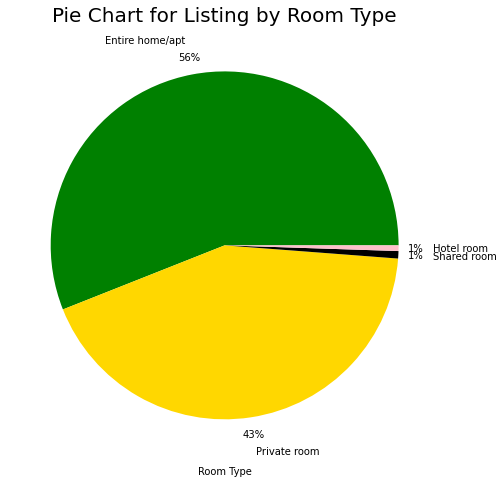

In [66]:

listings['room_type'].value_counts().plot(kind = 'pie', colors=['green', 'gold', 'black', 'pink'], figsize = (8, 8), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Pie Chart for Listing by Room Type', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('')
plt.show()

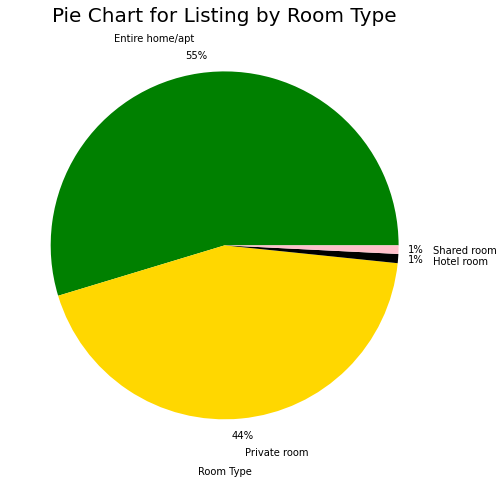

In [67]:

listings2020['room_type'].value_counts().plot(kind = 'pie', colors=['green', 'gold', 'black', 'pink'], figsize = (8, 8), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Pie Chart for Listing by Room Type', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('')
plt.show()

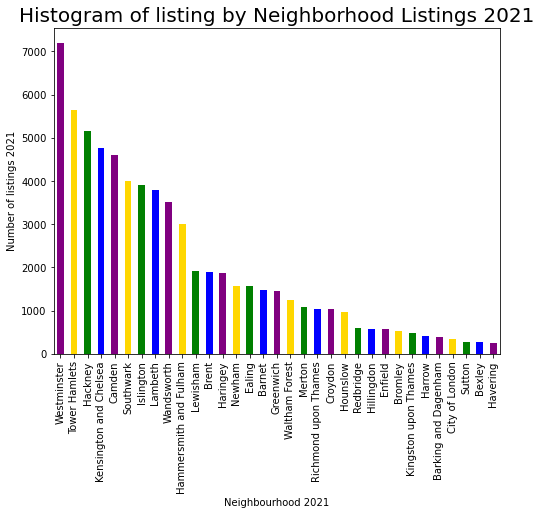

In [68]:
listings["neighbourhood_cleansed"].value_counts().plot(
    kind="bar", color=["purple", "gold", "green", "blue"], figsize=(8, 6)
)
plt.title("Histogram of listing by Neighborhood Listings 2021", fontsize=20)
plt.xlabel("Neighbourhood 2021")
plt.ylabel("Number of listings 2021")
plt.show()

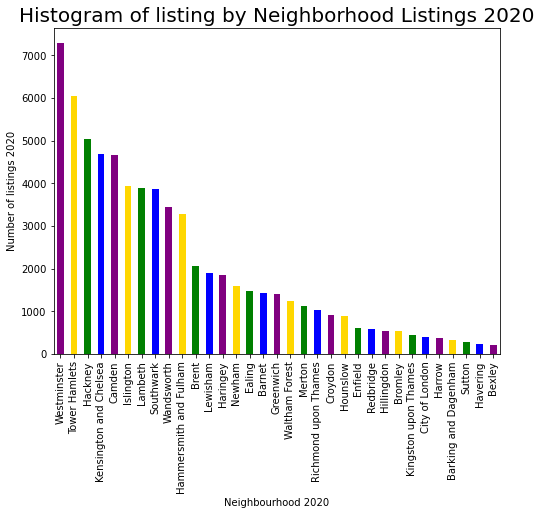

In [69]:
listings2020["neighbourhood_cleansed"].value_counts().plot(
    kind="bar", color=["purple", "gold", "green", "blue"], figsize=(8, 6)
)
plt.title("Histogram of listing by Neighborhood Listings 2020", fontsize=20)
plt.xlabel("Neighbourhood 2020")
plt.ylabel("Number of listings 2020")
plt.show()

### 2.7.2 List of the Most common type of room in every price

In [70]:
print("List of the Most common type of room in every price 2021: \n")
prices = listings["price"].value_counts().keys().tolist()
for price in prices:
    print(
        "{}: {} - entries: {}".format(
            price,
            np.argmax(
                listings.loc[listings["price"] == price][
                    "room_type"
                ].value_counts()
            ),
            np.max(
                listings.loc[listings["price"] == price][
                    "room_type"
                ].value_counts()
            ),
        )
    )

List of the Most common type of room in every price 2021: 

50.0: 0 - entries: 1707
40.0: 0 - entries: 1965
100.0: 0 - entries: 1632
35.0: 0 - entries: 1724
30.0: 0 - entries: 1745
60.0: 0 - entries: 1035
80.0: 0 - entries: 1140
45.0: 0 - entries: 1349
150.0: 0 - entries: 1237
70.0: 0 - entries: 840
120.0: 0 - entries: 1226
90.0: 0 - entries: 1061
75.0: 0 - entries: 881
25.0: 0 - entries: 1280
65.0: 0 - entries: 621
55.0: 0 - entries: 782
85.0: 0 - entries: 760
110.0: 0 - entries: 768
95.0: 0 - entries: 726
200.0: 0 - entries: 727
130.0: 0 - entries: 572
99.0: 0 - entries: 493
20.0: 0 - entries: 553
140.0: 0 - entries: 520
250.0: 0 - entries: 519
38.0: 0 - entries: 475
49.0: 0 - entries: 383
125.0: 0 - entries: 450
29.0: 0 - entries: 472
28.0: 0 - entries: 472
39.0: 0 - entries: 438
32.0: 0 - entries: 427
180.0: 0 - entries: 410
89.0: 0 - entries: 327
160.0: 0 - entries: 401
1570.0: 0 - entries: 317
69.0: 0 - entries: 244
48.0: 0 - entries: 312
27.0: 0 - entries: 370
36.0: 0 - entries:

In [71]:
print("List of the Most common type of room in every price 2020: \n")
prices2020 = listings2020["price"].value_counts().keys().tolist()
for price2020 in prices2020:
    print(
        "{}: {} - entries: {}".format(
            price2020,
            np.argmax(
                listings2020.loc[listings2020["price"] == price2020][
                    "room_type"
                ].value_counts()
            ),
            np.max(
                listings2020.loc[listings2020["price"] == price2020][
                    "room_type"
                ].value_counts()
            ),
        )
    )

List of the Most common type of room in every price 2020: 

50.0: 0 - entries: 1759
40.0: 0 - entries: 1939
35.0: 0 - entries: 1863
100.0: 0 - entries: 1514
30.0: 0 - entries: 1841
45.0: 0 - entries: 1460
60.0: 0 - entries: 995
80.0: 0 - entries: 1056
25.0: 0 - entries: 1392
70.0: 0 - entries: 786
75.0: 0 - entries: 887
90.0: 0 - entries: 1028
120.0: 0 - entries: 1107
150.0: 0 - entries: 1074
55.0: 0 - entries: 819
65.0: 0 - entries: 564
85.0: 0 - entries: 791
110.0: 0 - entries: 763
95.0: 0 - entries: 667
200.0: 0 - entries: 678
99.0: 0 - entries: 572
20.0: 0 - entries: 604
39.0: 0 - entries: 558
28.0: 0 - entries: 553
49.0: 0 - entries: 444
130.0: 0 - entries: 521
29.0: 0 - entries: 545
125.0: 0 - entries: 503
140.0: 0 - entries: 504
38.0: 0 - entries: 482
250.0: 0 - entries: 450
32.0: 0 - entries: 456
27.0: 0 - entries: 435
89.0: 0 - entries: 344
69.0: 0 - entries: 264
180.0: 0 - entries: 387
59.0: 0 - entries: 244
36.0: 0 - entries: 379
26.0: 0 - entries: 383
22.0: 0 - entries: 373

### 2.7.3 Price per Room Type

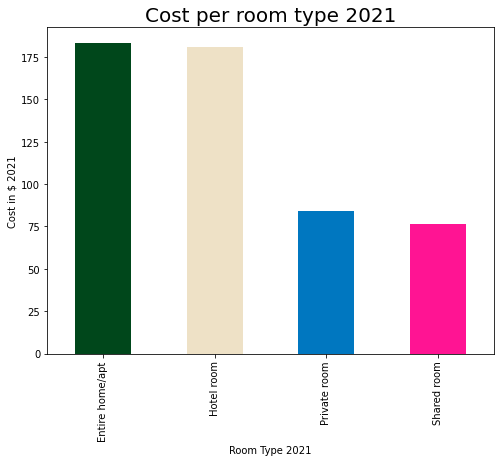

In [72]:
room_types = listings.groupby('room_type')
# FInd out the mean value of the prices in each room type
prices = room_types['price'].mean().sort_values(ascending = False)
prices.plot(kind = 'bar', color=['#00471b', '#eee1c6', '#0077c0','#FF1493'] ,figsize = (8, 6))
#x=np.arange(room_types)
#y=np.array(listings['price'])
#for a,b in zip(x,y): ##控制标签位置
   
   # plt.text(a-0.27,b+0.1,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=14)

plt.title('Cost per room type 2021', fontsize = 20)
plt.xlabel('Room Type 2021')
plt.ylabel('Cost in $ 2021')
plt.show('Cost per room type 2021')

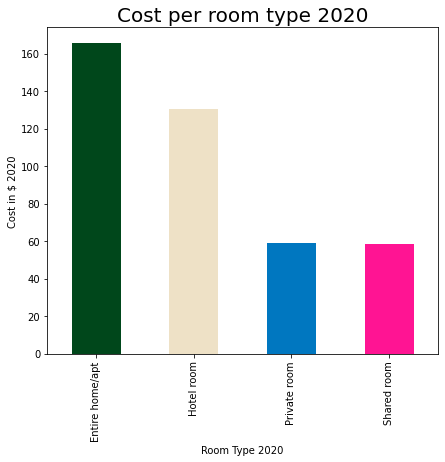

In [73]:
room_types2020 = listings2020.groupby('room_type')
# FInd out the mean value of the prices in each room type
prices2020 = room_types2020['price'].mean().sort_values(ascending = False)
prices2020.plot(kind = 'bar', color=['#00471b', '#eee1c6', '#0077c0','#FF1493'] ,figsize = (7, 6))
#for a,b in zip(room_types2020, prices2020):
   # plt.text(a,b,
           # b,
           # ha='center', 
             #va='bottom',
           # )
plt.title('Cost per room type 2020', fontsize = 20)
plt.xlabel('Room Type 2020')
plt.ylabel('Cost in $ 2020')
plt.show()

### 2.7.4  Possible Correlation Analysis.

In [74]:

newcols = [
    "neighbourhood_cleansed",
    "id",
    "listing_url",
    "last_scraped",
    "name",
    "description",
    "host_id",
    "host_name",
    "host_since",
    "host_location",
    "host_is_superhost",
    "host_listings_count",
    "host_total_listings_count",
    "host_verifications",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms_text",
    "bedrooms",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "number_of_reviews",
    "first_review",
    "last_review",
    "review_scores_rating",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "instant_bookable",
    "calculated_host_listings_count",
    "reviews_per_month",
]
#['host_about', 'host_response_rate', 'bathrooms', 'license', 'host_acceptance_rate'] not in index"

In [75]:

newcols2020 = [
    "neighbourhood_cleansed",
    "id",
    "listing_url",
    "last_scraped",
    "name",
    "description",
    "host_id",
    "host_name",
    "host_since",
    "host_location",
    "host_is_superhost",
    "host_listings_count",
    "host_total_listings_count",
    "host_verifications",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms_text",
    "bedrooms",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "number_of_reviews",
    "first_review",
    "last_review",
    "review_scores_rating",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "instant_bookable",
    "calculated_host_listings_count",
    "reviews_per_month",
]
#['host_about', 'host_response_rate', 'bathrooms', 'license', 'host_acceptance_rate'] not in index"

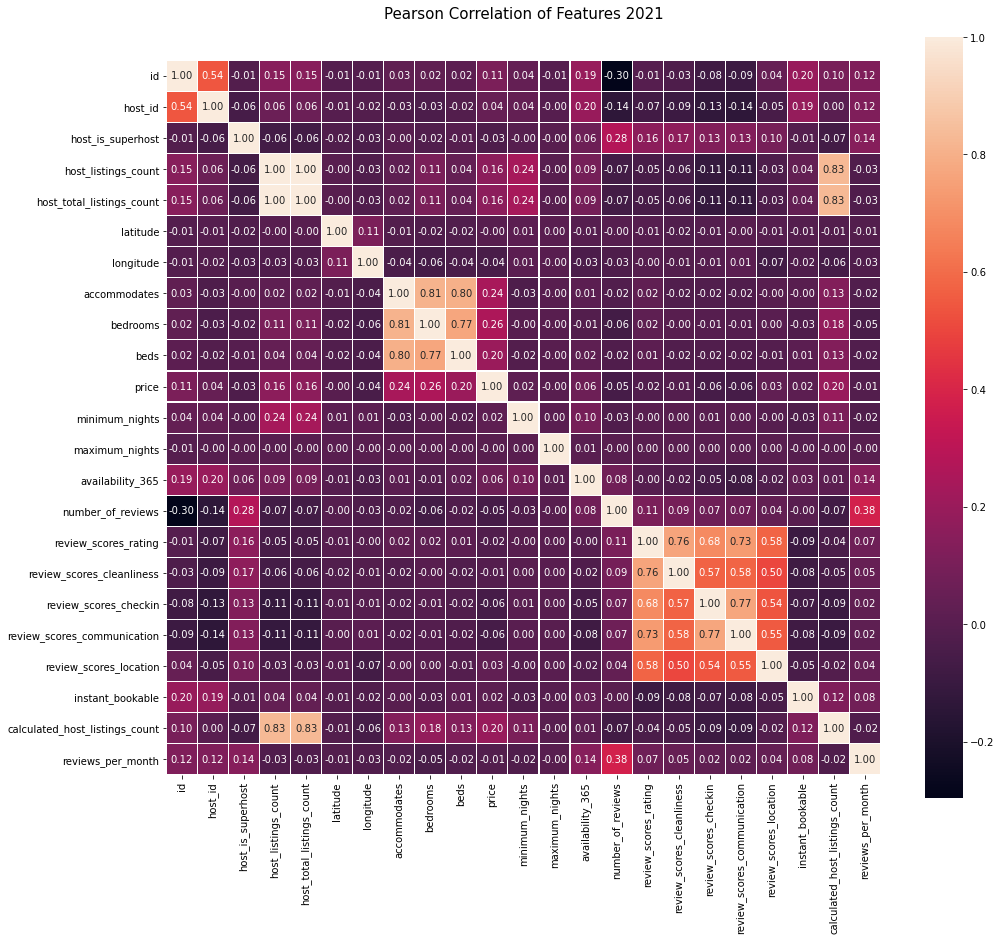

In [76]:

plt.figure(figsize=(16,14))#
plt.title('Pearson Correlation of Features 2021',y=1.05,size=15)
#col = [ 'neighbourhood_cleansed','room_type','price', 'minimum_nights','calculated_host_listings_count','latitude', 'longitude','availability_365']
#corr_pearson = listings[col].corr()
#sns.heatmap(corr_pearson, yticklabels = col, xticklabels = col, annot=True, fmt=".2f");

sns.heatmap(listings[newcols].corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True,fmt=".2f")

plt.show()


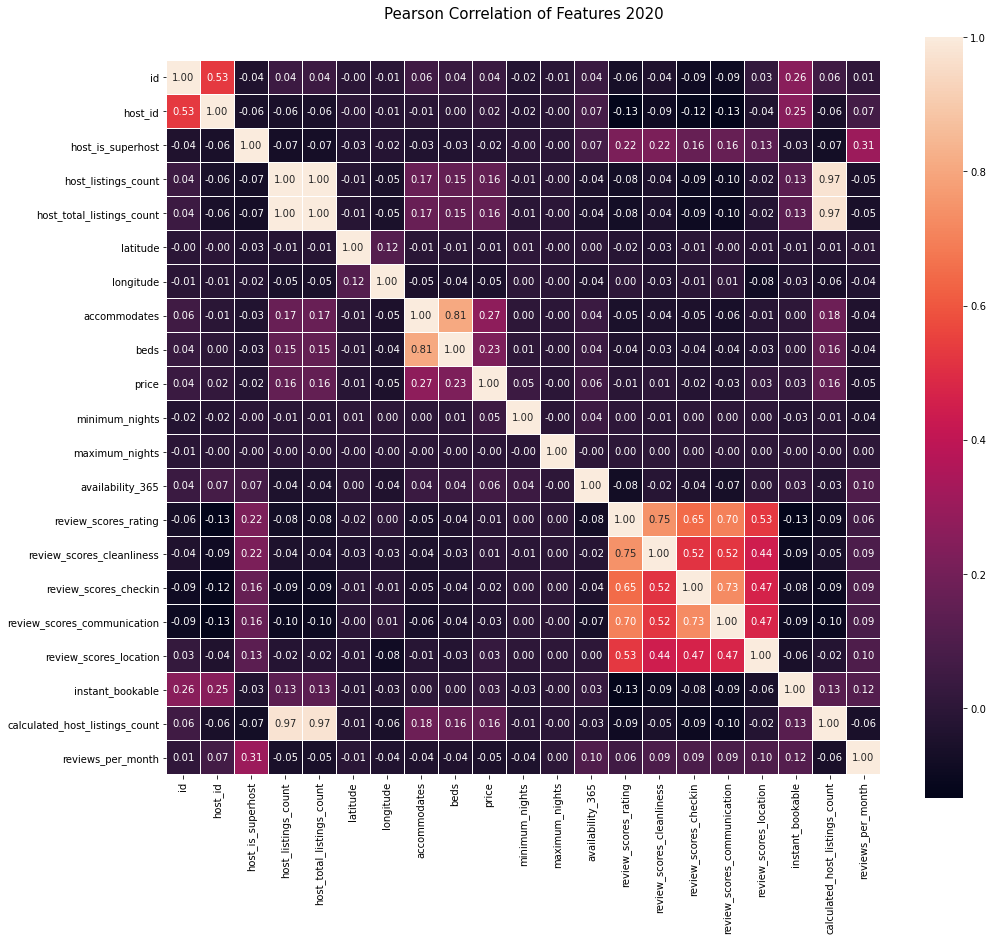

In [77]:

plt.figure(figsize=(16,14))#
plt.title('Pearson Correlation of Features 2020',y=1.05,size=15)
#col = [ 'neighbourhood_cleansed','room_type','price', 'minimum_nights','calculated_host_listings_count','latitude', 'longitude','availability_365']
#corr_pearson = listings[col].corr()
#sns.heatmap(corr_pearson, yticklabels = col, xticklabels = col, annot=True, fmt=".2f");

sns.heatmap(listings2020[newcols2020].corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True,fmt=".2f")

plt.show()


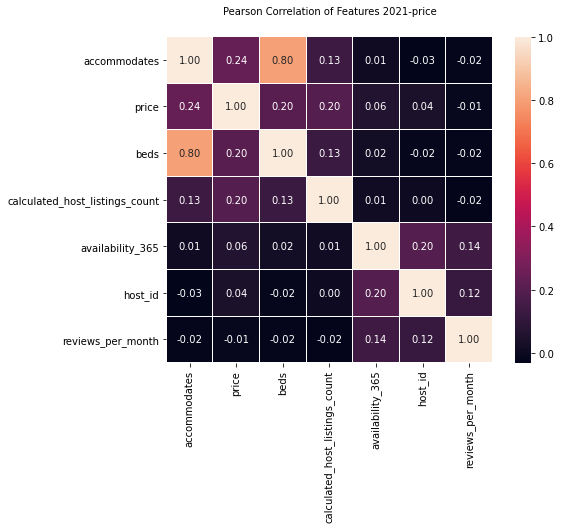

In [78]:
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features 2021-price',y=1.05,size=10)
col = [ 'accommodates','room_type','price', 'beds','calculated_host_listings_count','availability_365','host_id','reviews_per_month']
sns.heatmap(listings[col].corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True,fmt=".2f")

plt.show()

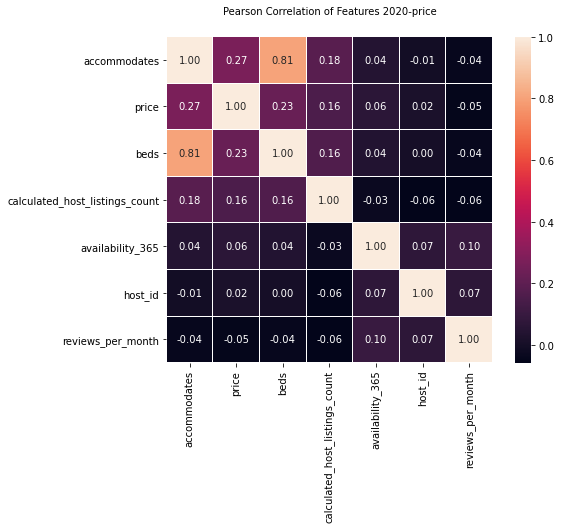

In [79]:
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features 2020-price',y=1.05,size=10)
col2020 = [ 'accommodates','room_type','price', 'beds','calculated_host_listings_count','availability_365','host_id','reviews_per_month']
sns.heatmap(listings2020[col2020].corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True,fmt=".2f")

plt.show()

#  Executive Briefing

## 3.1 Introduction

As the COVID-19 epidemic has spread around the world, it has forced the world economy into recession and has limited the structure of the real estate market in the global industry (Monitor, 2020), and even more governments are facing high unemployment rates. As a result the people of the UK have also suffered from unemployment, low wages, increased business failures, inflation and the structure of an unresponsive market. This has had an equal impact on the property market as people have been forced to leave businesses (Arcaya, Nidam & Binet, 2020). The government is also advocating for people to return home or work from home, and expats and locals with houses and properties in London are also being forced to terminate their contracts, so rental agreements are being affected the most.<P>
With this shift in supply and demand, it is worth exploring whether the prices of Airbnb's listings, the world's largest short term rental platform, will be subject to fluctuations. This briefing therefore explores the impact of the Covid-19 epidemic on Airbnb's daily prices and what changes Airbnb can make to meet the challenges posed by the COVID-19 epidemic, based on Airbnb listing data for the 2020 and 2021 timeframes.


## 3.2 Key Findings

### 3.2.1 Overall Price Increase

The average price of an Airbnb listing is calculated to be 118 as of September 2020, rising to 140 as of September 2021, an 18.6% increase in the average price. According to Airbnb statistics, the average price of a London listing in 2020 is 118 per night, but in 2019 the average price is 129, meaning that the average price of an Airbnb listing will increase by 9.3% from 2019 to 2020. This is a surprising result, as the average price of a home in 2021 is growing at twice the rate of 2020, and the average price of an Airbnb listing is not decreasing but increasing at a faster rate.
<p>

In [80]:

print(f"The mean price is {listings.price.mean():0.2f}")
print(f"The median price is {listings.price.median():0.2f}")


The mean price is 140.10
The median price is 80.00


In [81]:

print(f"The mean price is {listings2020.price.mean():0.2f}")
print(f"The median price is {listings2020.price.median():0.2f}")


The mean price is 118.01
The median price is 78.00




The simple fact behind this is that the shortage of Airbnb listings in 2021 is causing prices to rise. On one hand, because of the COVID-19 outbreak in 2020, the COVID-19 outbreak policy enforced by the global government has caused some foreign or local hosts to exit the London market and return to their home countries. The UK government's six-month-long lockdown policy, implemented from March 26, 2020, left Airbnb listings facing a 300% vacant rental list (Monitor, 2020). Airbnb officials claim bookings are also down by 75%. Originally Airbnb's biggest advantage was the ability to tap into existing housing stock (Zervas, Proserpio and Byers, 2017), but it is clear that demand has fallen dramatically, causing panic among hosts. Some landlords are in fear of the instability of the COVID-19 epidemic, and this has prompted them to turn to the long-term rental market, as they feel safer. This, coupled with the fact that at the same time Airbnb property owners are fighting for fixed costs such as cleaning and service charges, mortgages on their properties and local taxes, has led them to cover these costs in their rents. Or the need for financial support to cover these expenses has forced some landlords to shift their focus from the boom in short-term rentals to long-term rental space (Gyódi, 2021).<p>
    
Real estate websites have also overseen an increase in long-term rentals as Airbnb enters the long-term rental market more and more. Let's go back to the ONS statistics, which also show that the impact of the covid-19 epidemic on the overall private rental market in London is not promising. The Index of Private Housing Rental Prices in London increased by 0.9% for the 12 months to September 2019, 1.2% for the 12 months to October 2020 and -0.3% for the 12 months to September 2021. From August 2020 onwards, the growth rate began to show a downward trend and has been declining ever since. The country is also facing a decline in property prices. This economic disruption has also led to a change in the focus of Airbnb's structure and their $1 billion investment in medium to long term property investments, market disruption and the ambitions of real estate agents, which will inevitably change the focus of the market to medium to long term rentals as the post-Covid economic response. These reasons are leading to a reduction in the supply of properties in 2021 compared to 2020.<p>

On the other hand, with the implementation of the unsealing policy in 2021, there will be an explosion of pent-up demand for travel, with people eager to get out and about to express their feelings after almost a year of COVID-19 repression. A large number of events have resumed, such as the European Cup. These events have prompted Airbnb to sponsor the games to capitalise on the demand for accommodation generated by such seasonal sporting events (Fairley, Macinnes and Dolnicar, 2021). There is more enthusiasm for going out in 2021 than in 2020. Airbnb has reduced its involvement in political and community events over the years but has also reconsidered its strategy and decided to go back to where it started to combat the impact of the COVID-19 epidemic. Airbnb looked more advantageous during the epidemic, the platform was making unused homes available, whereas hotels had to bear the losses themselves (Perez-Sanchez et al., 2018). The additional effect of policy, with many hotels closing and those who have to use them looking to Airbnb, has also affected the increase in demand in 2021. <p>


### 3.2.2 Hotel Rooms Have Risen the Most

The market share of each room type has not changed much, and prices have increased. The most noticeable increase is in hotel rooms, followed by private rooms, shared rooms and entire home/apt, which has seen the least increase.<P>

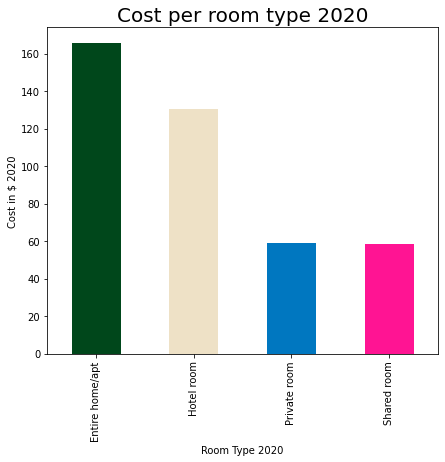

In [82]:
room_types2020 = listings2020.groupby('room_type')
# FInd out the mean value of the prices in each room type
prices2020 = room_types2020['price'].mean().sort_values(ascending = False)
prices2020.plot(kind = 'bar', color=['#00471b', '#eee1c6', '#0077c0','#FF1493'] ,figsize = (7, 6))
#for a,b in zip(room_types2020, prices2020):
   # plt.text(a,b,
           # b,
           # ha='center', 
             #va='bottom',
           # )
plt.title('Cost per room type 2020', fontsize = 20)
plt.xlabel('Room Type 2020')
plt.ylabel('Cost in $ 2020')
plt.show()

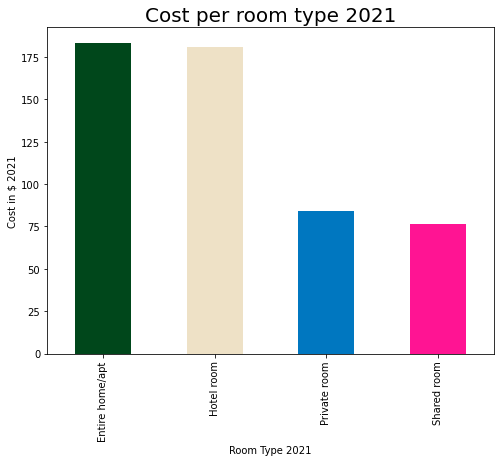

In [83]:
room_types = listings.groupby('room_type')
# FInd out the mean value of the prices in each room type
prices = room_types['price'].mean().sort_values(ascending = False)
prices.plot(kind = 'bar', color=['#00471b', '#eee1c6', '#0077c0','#FF1493'] ,figsize = (8, 6))
#x=np.arange(room_types)
#y=np.array(listings['price'])
#for a,b in zip(x,y): ##控制标签位置
   
   # plt.text(a-0.27,b+0.1,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=14)

plt.title('Cost per room type 2021', fontsize = 20)
plt.xlabel('Room Type 2021')
plt.ylabel('Cost in $ 2021')
plt.show('Cost per room type 2021')



The hotel room is an advantage in the particular case of the covid 19 epidemic. Although it only provides basic facilities such as a bed and bathroom like a hotel, it only requires us to have contact with the landlord or even with no one else through a combination lock, which eliminates physical contact with other people and guarantees a definite risk of being infected by the COVID-19 virus. The same applies to the entire room. In addition to the entire room/apt, it is possible to rent an entire flat, have more space, including a room that can be used as a home office, and have your kitchen which is essential if the dining room is to be closed for long periods.<P>

But the entire home/apt is least expensive because it can be converted to either a short term or long term rental, it is more flexible, landlords can place their properties on Airbnb and long term rental platforms, and there is clearer evidence that the cancellation rate for private rooms is more than 20% higher than entire homes in 2020 (Hu and Lee, For travellers, entire rooms/apt were the most popular choice during the COVID-19 epidemic (Bresciani et al., 2021), and access to the entire property was also the most important factor in finding accommodation besides location (Fairley, Macinnes and Dolnicar, 2021). This means that the market is more balanced in terms of supply and demand than the other three categories, with the lowest price increases.<P>
    
There are several reasons why the demand for hotel rooms is increasing more significantly. Although hotels have been slowly reopening from their 2020 closures, it is clear that they are not yet able to offer the same services as before, as many are understaffed, after all the closures have led to redundancies. This has attracted a large number of people who previously favoured hotels to opt for hotel-like Airbnb hotel rooms, so hotel rooms have seen the largest price increases.


### 3.3 Recommendations

The year-on-year rise in Airbnb rates has led to protests on Twitter and has resonated with a large number of people. As a service industry, the reaction of the public is crucial. The original low prices and similar services that have made Airbnb so successful over the past few years are now losing their competitive edge. To continue this success, prices need to be brought down.<P>

By first communicating the current situation of rising prices at Airbnb to both old and new hosts, the platform will also need to support hosts upfront to reduce the taxes they pay to Airbnb and keep the supply of listings flat. The concern is that viruses will continue to emerge as variants of the delta, omicron, etc. continue to emerge, and so will the Hotel room's dominance. So Airbnb should guide hosts to change the type of rooms or introduce new hotel room listings to meet the demand. Although Airbnb intends to enter the medium to long term rental market, it will take some time to do so. Maintaining the stability of the Airbnb short term rental market will certainly build a good reputation for Airbnb and create a good start for the long term rental market.<P>



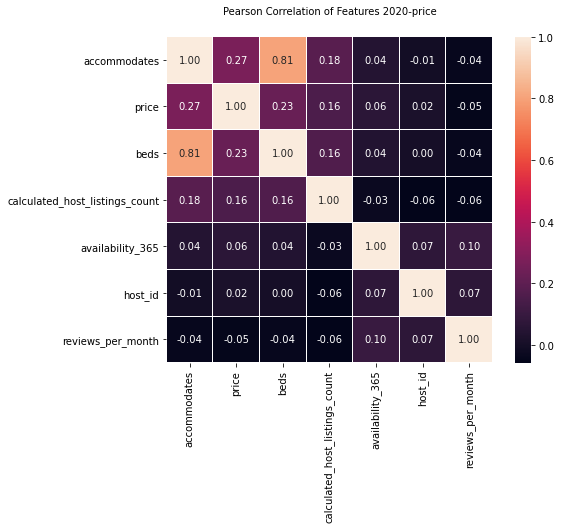

In [84]:
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features 2020-price',y=1.05,size=10)
col2020 = [ 'accommodates','room_type','price', 'beds','calculated_host_listings_count','availability_365','host_id','reviews_per_month']
sns.heatmap(listings2020[col2020].corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True,fmt=".2f")

plt.show()

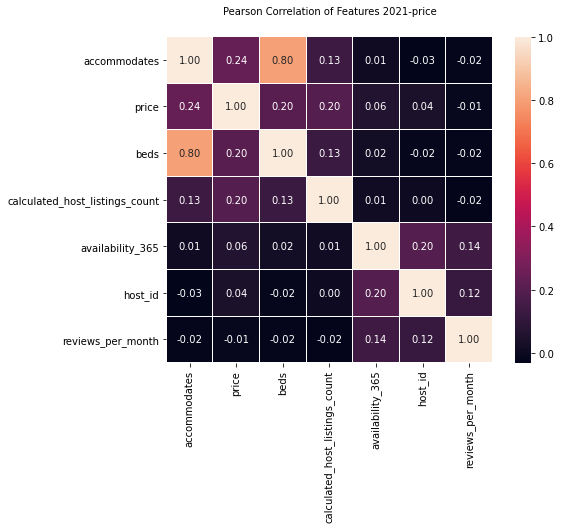

In [85]:
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features 2021-price',y=1.05,size=10)
col = [ 'accommodates','room_type','price', 'beds','calculated_host_listings_count','availability_365','host_id','reviews_per_month']
sns.heatmap(listings[col].corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True,fmt=".2f")

plt.show()


The correlation factor analysis also shows that price is related to the number of properties owned by the host, and whether or not to book more time slots within a year is related to the hosts themselves and their reviews. Airbnb seems to give hosts too much power over prices, for example by giving them the right to set their cleaning fees and rates based on factors such as size, location, guest capacity and amenities, which can make listings confusing. There are also several trust-building mechanisms implemented by Airbnb, namely the granting of super-host status, which can help translate into tangible economic value for hosts, such as the ability to raise prices (Ltd, 2017). These people who can attract more tenants should be the subject of Airbnb's endpoint guidance, as well as these rights regarding price setting should be appropriately curtailed to maintain basic price stability.<P>

## References

Airbnb (n.d.), I rent out my home in London. What short-term rental laws apply? Airbnb; URL: https://www.airbnb.co.uk/help/article/1340/i-rent-out-my-home-in-london-what-shortterm-rental-laws-apply <p>
    
Arcaya, M. C., Nidam, Y., Binet, A., Gibson, R., & Gavin, V. (2020). Rising home values and Covid-19 case rates in London. Social Science & Medicine, 265, 113290.<p>
    
Bresciani, S., Ferraris, A., Santoro, G., Premazzi, K., Quaglia, R., Yahiaoui, D. and Viglia, G. (2021). ‘The seven lives of Airbnb. The role of accommodation types’. Annals of Tourism Research, 88, p. 103170. doi: 10.1016/j.annals.2021.103170.<p>
    
Fairley, S., Macinnes, S. and Dolnicar, S. (2021). Airbnb and events – before, during and after COVID-19. figshare. doi: 10.6084/m9.figshare.14204558.v1.<p>
    
Gyódi, K. (2021). ‘Airbnb and hotels during COVID-19: different strategies to survive’. International Journal of Culture, Tourism and Hospitality Research. doi: 10.1108/IJCTHR-09-2020-0221.<p>
    
Hu, M. and Lee, A. D. (2020). Airbnb, COVID-19 Risk and Lockdowns: Local and Global Evidence. SSRN Scholarly Paper ID 3589141. Rochester, NY: Social Science Research Network. doi: 10.2139/ssrn.3589141.<p>
    
Ltd, I.-I. B. (2017). ‘PRICE DETERMINANTS ON AIRBNB: HOW REPUTATION PAYS OFF IN THE SHARING ECONOMY’. Journal of Self-Governance and Management Economics. Addleton Academic Publishers, 5 (4), pp. 53–80.<p>
    
Monitor, I. L. O. (2020). COVID-19 and the world of work. Updated estimates and analysis.<p>
    
Perez-Sanchez, V. R., Serrano-Estrada, L., Marti, P. and Mora-Garcia, R.-T. (2018). ‘The What, Where, and Why of Airbnb Price Determinants’. Sustainability. Multidisciplinary Digital Publishing Institute, 10 (12), p. 4596. doi: 10.3390/su10124596.<p>
    
Zervas, G., Proserpio, D. and Byers, J. W. (2017). ‘The Rise of the Sharing Economy: Estimating the Impact of Airbnb on the Hotel Industry’. Journal of Marketing Research. SAGE Publications Inc, 54 (5), pp. 687–705. doi: 10.1509/jmr.15.0204.<p>
